# CANDEV 2022

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("INCIDENT_OWNER_HISTORY.csv")
dfI = pd.read_csv("INCIDENTS.csv")


c:\testenv\testenv\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


***Le temps moyen que les incidents passent dans un statut particulier.***

In [3]:
df.groupby('STATUS').mean()


,TIME_IN_STATUS_BY_OWNER_HRS
STATUS,
AWAITCHG,127.377065
AWAITCUS,85.690441
AWAITVEN,144.054339
CLOSED,NaN
HISTEDIT,16.639815
INPROG,40.150039
NEW,8.283333
PENDING,68.230397
PENDINGCHG,158.836006


![](StatusAverageHisto.png)

![](StatusAverageCircle1.png)

***Le nombre de fois qu'un incident est réassigné pendant la durée de vie du ticket.***


In [4]:
#remove NAN value in TIME IN STATUT
df = df[df['TIME_IN_STATUS_BY_OWNER_HRS'].notna()]
#remove NAN value in TIME IN Assigned group
df = df[df['assigned_group'].notna()]
df_new1 = pd.DataFrame(columns=['ticket_nmbr','assigned_group','TIME_IN_STATUS_BY_OWNER_HRS'])
df_new1['ticket_nmbr'] = df['ticket_nmbr']
df_new1['TimeInHour'] = df['TIME_IN_STATUS_BY_OWNER_HRS']
# Groupby and sum
df_new1 = df_new1.groupby(["ticket_nmbr"]).agg({"TimeInHour": "sum"}).sort_values(["ticket_nmbr"]).reset_index()
df_new2 = df.groupby(["ticket_nmbr","assigned_group"]).agg({"TIME_IN_STATUS_BY_OWNER_HRS": "sum"}).sort_values(["ticket_nmbr","assigned_group" ]).reset_index()
occurence = df_new2.pivot_table(columns=["ticket_nmbr"], aggfunc='size')
df_new1['R_occur'] = occurence.tolist()

In [5]:
#tableau qui montre le nombre de reassignement pour chaque tickets
df_new1

,ticket_nmbr,TimeInHour,R_occur
0,IN10028612,8.383333,1
1,IN10028613,64.100000,1
2,IN10028614,8.750000,1
3,IN10028615,3.616667,1
4,IN10028617,116.150000,1
...,...,...,...
224413,IN10293549,0.000000,2
224414,IN10293550,0.000000,1
224415,IN10293551,0.000000,1
224416,IN10293552,0.000000,2


In [6]:
df_new1.R_occur.max()

14

In [7]:
df_new1.R_occur.mean()

1.382901549786559

***Le temps moyen que les incidents passent avec un groupe de support particulier (Assigned_Group).***


In [6]:
df_new2.to_csv("df_new2.csv",index=False)

df_new2.groupby('assigned_group').mean()


,TIME_IN_STATUS_BY_OWNER_HRS
assigned_group,
1769,6.050000
AP000001,109.789474
AP000003,399.466667
AP000004,551.600000
AP000005,0.616667
...,...
SM000585,21.248418
SM000586,0.000000
SOLADMIN,1.416667


In [7]:
df_new2

,ticket_nmbr,assigned_group,TIME_IN_STATUS_BY_OWNER_HRS
0,IN10028612,DC000152,8.383333
1,IN10028613,NDS00032,64.100000
2,IN10028614,DC000155,8.750000
3,IN10028615,DC000133,3.616667
4,IN10028617,DC000115,116.150000
...,...,...,...
310343,IN10293550,DC000263,0.000000
310344,IN10293551,DC000152,0.000000
310345,IN10293552,DC000155,0.000000
310346,IN10293552,SM000562,0.000000


***Temps moyen pour restaurer le service (MTRS), y a-t-il des services particuliers qui prennent plus de temps en moyenne pour être restaurés ?***


In [8]:
df_servicelong = df.groupby('service').mean()
df_servicelong

,TIME_IN_STATUS_BY_OWNER_HRS
service,
Bulk Print,377.007738
Classified Infrastructure - GCSI - Hosting Environment,43.980464
Classified Infrastructure - Government of Canada Secret Infrastructure (GCSI),107.905556
Cloud Brokering,63.118243
Conferencing - Videoconferencing,43.938437
...,...
To be determined,309.741667
Toll-free Voice,55.636462
WTD - Hardware,142.022840


In [9]:
df_servicelong.max()

TIME_IN_STATUS_BY_OWNER_HRS    1973.583333
dtype: float64

***Existe-t-il une corrélation entre le nombre de réaffectations d'un incident et le temps nécessaire à sa restauration ?***

Ce graph a ete faite avec le logiciel R

![](corellation1.png)

***Y a-t-il des organisations particulières pour lesquelles il faut plus de temps en moyenne pour restaurer les services ?***


In [10]:
df_new2.max()


ticket_nmbr                    IN10293554
assigned_group                     TIVMON
TIME_IN_STATUS_BY_OWNER_HRS        7307.2
dtype: object

# COMPREHENSION DE DONNEES

In [11]:
df.STATUS.unique()


array(['QUEUED', 'RESOLVED', 'INPROG', 'PENDINGREV', 'PENDING',
       'PENDINGCHG', 'PENDINGVEN', 'PENDINGCUS', 'HISTEDIT', 'AWAITCHG',
       'AWAITCUS', 'SLAHOLD', 'AWAITVEN', 'NEW'], dtype=object)

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


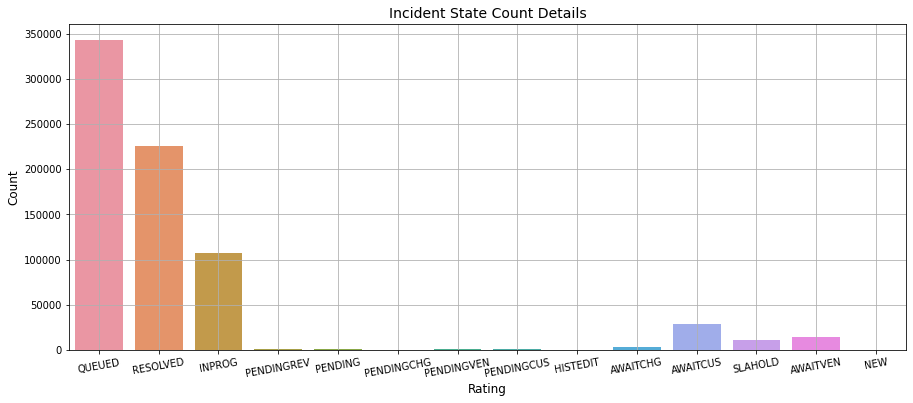

In [16]:
# Status incidents
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['STATUS'],ax=ax)
plt.title("Incident State Count Details", size = 14)
plt.xlabel("Rating", size=12)
plt.ylabel("Count", size=12)
plt.xticks(rotation=10)
plt.grid()
plt.show()

On peut voir ici qu'il y a beaucoup de ticket qui sont dans le queue. C'est a dire que c'est tickets sont en attentes de traitements


C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


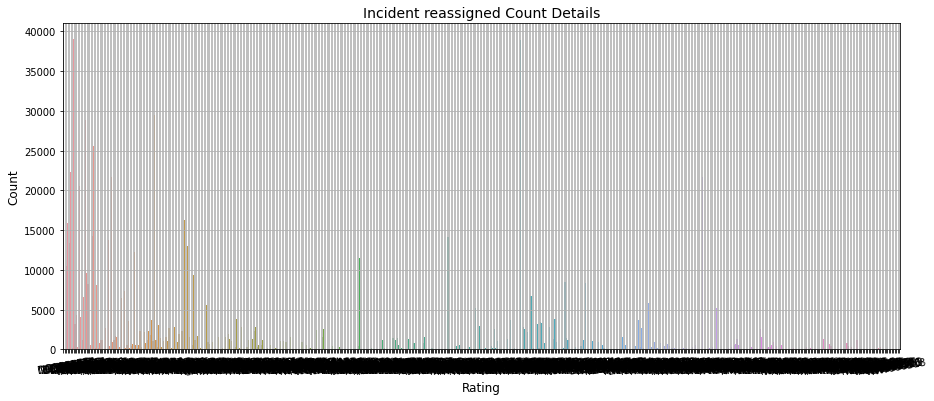

In [11]:
# assigned_group incidents
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['assigned_group'],ax=ax)
plt.title("Incident reassigned Count Details", size = 14)
plt.xlabel("Rating", size=12)
plt.ylabel("Count", size=12)
plt.xticks(rotation=10)
plt.grid()
plt.show()

In [12]:
df['assigned_group'].value_counts()


ESI00011    39072
DC000203    38884
DC000152    29778
NW000412    29538
NW000417    28848
            ...  
EU000201        1
COR00555        1
ENT00004        1
DC000103        1
DC000259        1
Name: assigned_group, Length: 579, dtype: int64

In [19]:
df.PARENT_SERVICE.unique()


array(['Middleware', 'Midrange', 'Mainframe',
       'High-performance Computing', 'Other Activities', 'Mobile Devices',
       'GC WAN', 'Intra-building Network Services', 'Email', 'Database',
       'Directory Services', 'Secure Remote Access',
       'Data Centre Facilities Management', nan, 'Storage',
       'Distributed Print', 'Fixed Line', 'Toll-free Voice',
       'Internal Credential Management (ICM)', 'Contact Centre',
       'Conferencing Services',
       'Government of Canada Managed Security Service', 'Bulk Print',
       'WTD Provisioning', 'Cloud Brokering', 'Satellite',
       'Classified Infrastructure', 'Solutions Integration Service (SIS)',
       'Firewall', 'Managed Secure File Transfer',
       'IT Continuity Support Service', 'Workplace Technology Services'],
      dtype=object)

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


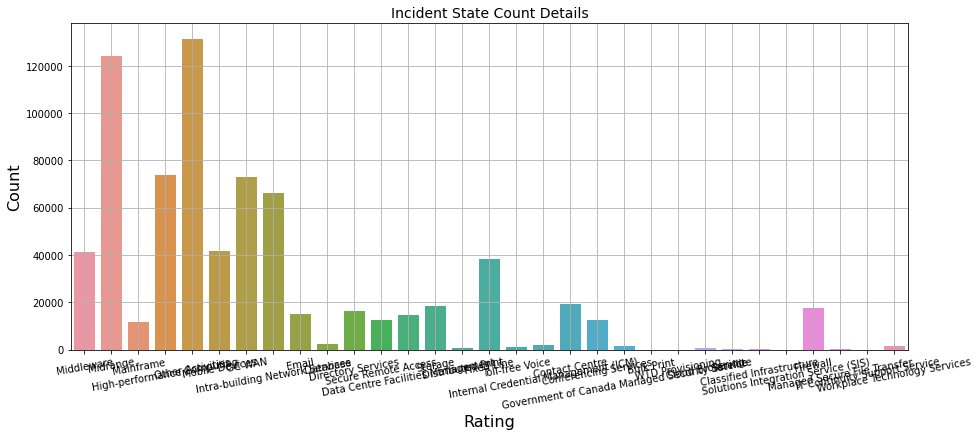

In [22]:
# Status incidents
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['PARENT_SERVICE'],ax=ax)
plt.title("Incident State Count Details", size = 14)
plt.xlabel("Rating", size=16)
plt.ylabel("Count", size=16)
plt.xticks(rotation=10)
plt.grid()
plt.show()

In [10]:
df['PARENT_SERVICE'].value_counts()


Other Activities                                 131363
Midrange                                         123995
High-performance Computing                        74063
GC WAN                                            73054
Intra-building Network Services                   66202
Mobile Devices                                    41610
Middleware                                        41328
Fixed Line                                        38193
Contact Centre                                    19266
Storage                                           18458
Firewall                                          17735
Directory Services                                16305
Email                                             15155
Data Centre Facilities Management                 14603
Secure Remote Access                              12563
Conferencing Services                             12505
Mainframe                                         11673
Database                                        

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


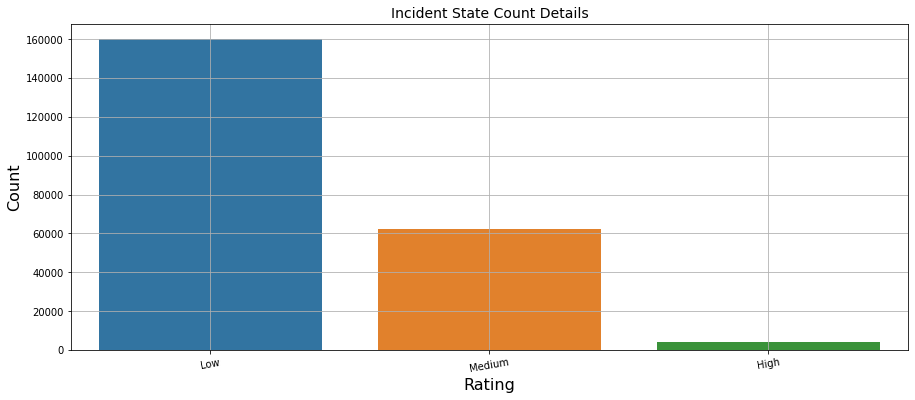

In [24]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(dfI['PRIORITY'],ax=ax)
plt.title("Incident State Count Details", size = 14)
plt.xlabel("Rating", size=16)
plt.ylabel("Count", size=16)
plt.xticks(rotation=10)
plt.grid()
plt.show()

In [26]:
dfI['PRIORITY'].value_counts()


Low       159904
Medium     62308
High        4084
Name: PRIORITY, dtype: int64

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


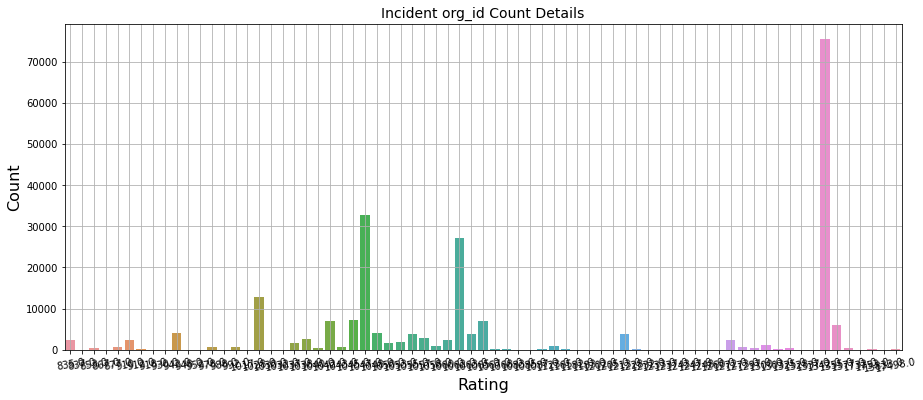

In [8]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(dfI['org_id'],ax=ax)
plt.title("Incident org_id Count Details", size = 14)
plt.xlabel("Rating", size=16)
plt.ylabel("Count", size=16)
plt.xticks(rotation=10)
plt.grid()
plt.show()

In [9]:
dfI['org_id'].value_counts()


1342.0    75443
1047.0    32789
1062.0    27054
1028.0    12910
1045.0     7312
          ...  
1248.0        2
837.0         1
867.0         1
1232.0        1
948.0         1
Name: org_id, Length: 71, dtype: int64

# Solution


Apres plusieurs reflexions sur le sujet, on a pu conclure que le fait d'allouer a un bot la classification des incidents permetterait d'ameliorer l'efficaicter d'assignement des tickets a un groupes particuliers(coder en java)et cela aura l'avantage de diminuer qu'un ticket soit reassigner plusieurs fois a plusieurs groupes et cela diminuera considerablement le nombre . On suggere aussi de limiter les nombres de tickets a chaque groupe de traitement de ticket et d'assigner un nombre maximum d'heure equivalent au nombre de tickets qu'ils ont recu. Tant que ses taches ne sont pas finis ou pas de places pour d'autres tickets, on ne pas assigner de ticket a ce groupe. On propose aussi de rotationner les ordres de priorites,c'est a dire que si un LOW depasse son delai de traitement, elle devient automatiquement un MEDIUM et si un MEDIUM deviendra un HIGH automatiquement. 